In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

# Cấu hình bộ vector hóa
MAX_VOCAB_SIZE = 10000  # Số lượng từ tối đa
MAX_SEQUENCE_LENGTH = 256  # Độ dài tối đa của câu

vectorize_layer = TextVectorization(
    max_tokens=MAX_VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

# Thu thập văn bản để tạo từ điển
train_texts = train_dataset.map(lambda text, label: text)
vectorize_layer.adapt(train_texts)

# Hàm vector hóa văn bản
def vectorize_text(text, label):
    text = vectorize_layer(text)
    return text, label

# Chuyển đổi dataset sang dạng số
train_dataset = train_dataset.map(vectorize_text)
test_dataset = test_dataset.map(vectorize_text)

# Cấu hình batch và prefetch
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Thông số mô hình
EMBEDDING_DIM = 64  # Kích thước embedding

EPOCHS = 10

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2HUTY0_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2HUTY0_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.2HUTY0_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


RNN

In [ ]:
# Xây dựng mô hình RNN
model1 = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)),
    SimpleRNN(32, dropout=0.3, recurrent_dropout=0.2),
    Dense(16, activation='elu'),
    Dropout(0.5),  # Dropout sau Dense
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,649 (2.46 MB)

 Trainable params: 643,649 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model1.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    callbacks=[early_stop1]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 159ms/step - accuracy: 0.4909 - loss: 0.7473 - val_accuracy: 0.4999 - val_loss: 0.6938
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 158ms/step - accuracy: 0.5002 - loss: 0.7044 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 158ms/step - accuracy: 0.4919 - loss: 0.6998 - val_accuracy: 0.4961 - val_loss: 0.6938
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.5009 - loss: 0.6959 - val_accuracy: 0.4922 - val_loss: 0.6944
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.5072 - loss: 0.6948 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 161ms/step - accuracy: 0.5011 - loss: 0.6940 - val_accuracy: 0.5138 - val_loss: 0.6929
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 163ms/step - accuracy: 0.5055 - loss: 0.6937 - val_accuracy: 0.5138 - val_loss: 0.6931
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 141ms/step - accuracy: 0.5089 - loss: 0

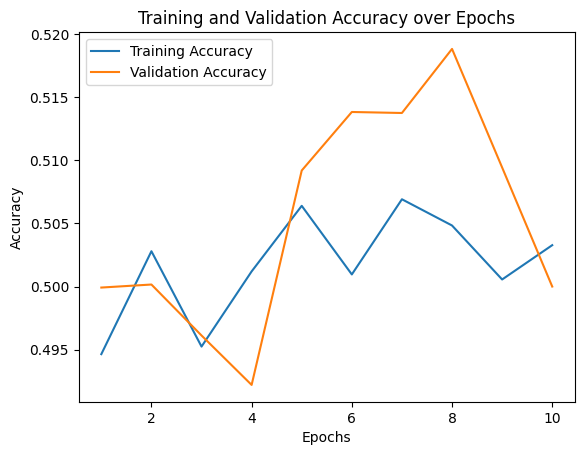

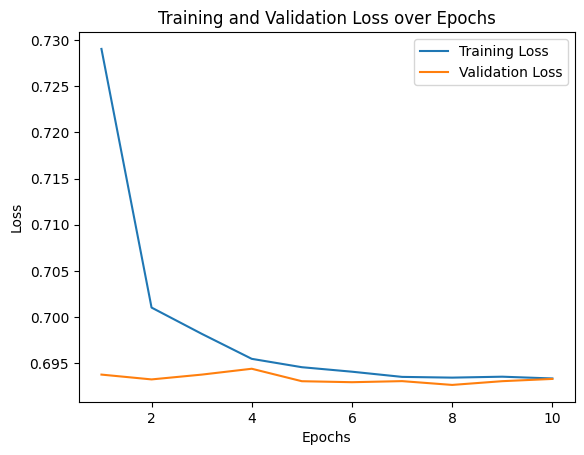

In [ ]:
# Số epoch thực tế đã chạy (do EarlyStopping có thể dừng sớm)
epochs_run1 = len(history1.history['loss'])
# Assuming `history` contains the training history of the model
accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

# Plotting
plt.plot(range(1, epochs_run1 + 1), accuracy1, label='Training Accuracy')
plt.plot(range(1, epochs_run1 + 1), val_accuracy1, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(range(1, epochs_run1 + 1), loss1, label='Training Loss')
plt.plot(range(1, epochs_run1 + 1), val_loss1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc1:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5181 - loss: 0.6927
Test Accuracy: 0.5188


In [ ]:
def predict_sentiment(review):
    review = tf.constant([review])  # Chuyển về dạng Tensor
    review = vectorize_layer(review)  # Mã hóa văn bản
    prediction = model1.predict(review)[0][0]  # Lấy xác suất dự đoán

    if prediction >= 0.5:
        print(f"Positive ({prediction:.4f})")
    else:
        print(f"Negative ({prediction:.4f})")

# Thử nghiệm với một câu mới
predict_sentiment("yeahhhh!")
predict_sentiment("i love you!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Positive (0.5101)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Positive (0.5101)


LSTM

In [ ]:
# Xây dựng mô hình LSTM
model2 = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)),
    LSTM(32, dropout=0.3, recurrent_dropout=0.2),
    Dense(16, activation='elu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 256, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,961 (2.49 MB)

 Trainable params: 652,961 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2 = model2.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    callbacks=[early_stop2]
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 170s 414ms/step - accuracy: 0.5059 - loss: 0.6938 - val_accuracy: 0.5196 - val_loss: 0.6915
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 170s 428ms/step - accuracy: 0.5553 - loss: 0.6819 - val_accuracy: 0.5426 - val_loss: 0.6779
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 182s 378ms/step - accuracy: 0.5984 - loss: 0.6342 - val_accuracy: 0.5675 - val_loss: 0.6621
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 165s 415ms/step - accuracy: 0.6132 - loss: 0.5935 - val_accuracy: 0.5751 - val_loss: 0.6714
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 151s 377ms/step - accuracy: 0.6193 - loss: 0.5719 - val_accuracy: 0.5703 - val_loss: 0.6970
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 154s 388ms/step - accuracy: 0.6531 - loss: 0.5459 - val_accuracy: 0.7725 - val_loss: 0.5667
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 155s 391ms/step - accuracy: 0.8118 - loss: 0.4472 - val_accuracy: 0.7696 - val_loss: 0.5989
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 158s 398ms/step - accuracy: 0.8355 -

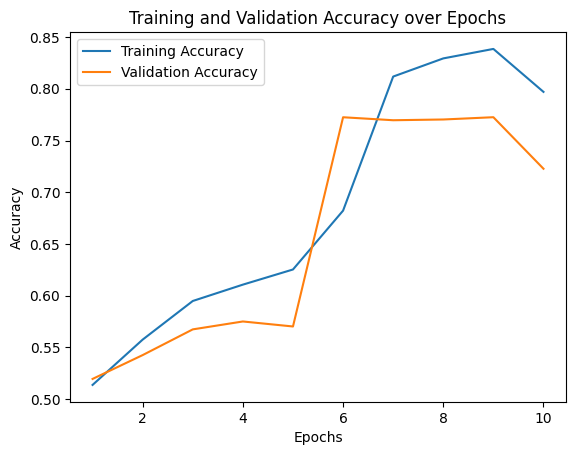

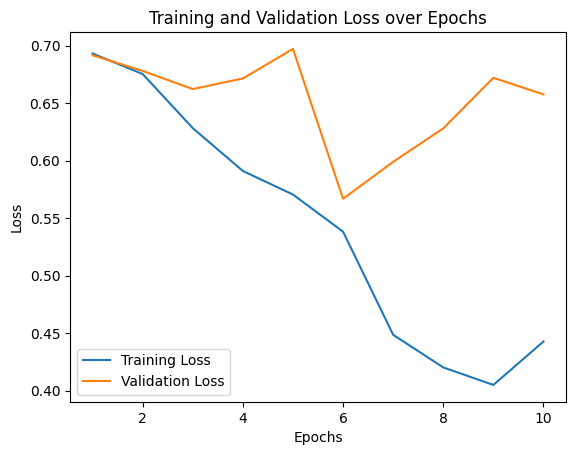

In [ ]:
# Số epoch thực tế đã chạy (do EarlyStopping có thể dừng sớm)
epochs_run2 = len(history2.history['loss'])

# Assuming `history` contains the training history of the model
accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Plotting
plt.plot(range(1, epochs_run2 + 1), accuracy2, label='Training Accuracy')
plt.plot(range(1, epochs_run2 + 1), val_accuracy2, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(range(1, epochs_run2 + 1), loss2, label='Training Loss')
plt.plot(range(1, epochs_run2 + 1), val_loss2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc2:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.7729 - loss: 0.5670
Test Accuracy: 0.7725


In [ ]:
def predict_sentiment(review):
    review = tf.constant([review])  # Chuyển về dạng Tensor
    review = vectorize_layer(review)  # Mã hóa văn bản
    prediction = model2.predict(review)[0][0]  # Lấy xác suất dự đoán

    if prediction >= 0.5:
        print(f"Positive ({prediction:.4f})")
    else:
        print(f"Negative ({prediction:.4f})")

# Thử nghiệm với một câu mới
predict_sentiment("The movie was absolutely amazing! I loved it.")
predict_sentiment("This is the worst film I have ever watched.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Positive (0.7469)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Negative (0.2056)


Bi_directional lstm

In [ ]:
# Xây dựng mô hình Bi-directional LSTM
model3 = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)),
    Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.2)),
    Dense(16, activation='elu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 256, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,889 (2.54 MB)

 Trainable params: 665,889 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history3 = model3.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    callbacks=[early_stop3]
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 278s 669ms/step - accuracy: 0.6187 - loss: 0.6265 - val_accuracy: 0.7770 - val_loss: 0.4740
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 329s 688ms/step - accuracy: 0.8278 - loss: 0.4184 - val_accuracy: 0.8162 - val_loss: 0.4175
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 775ms/step - accuracy: 0.8624 - loss: 0.3495 - val_accuracy: 0.8031 - val_loss: 0.4498
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 775ms/step - accuracy: 0.8839 - loss: 0.3107 - val_accuracy: 0.8112 - val_loss: 0.4408
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 266s 674ms/step - accuracy: 0.8811 - loss: 0.3090 - val_accuracy: 0.8134 - val_loss: 0.4456
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 364s 782ms/step - accuracy: 0.8951 - loss: 0.2785 - val_accuracy: 0.8298 - val_loss: 0.4316
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 270s 685ms/step - accuracy: 0.9191 - loss: 0.2292 - val_accuracy: 0.8222 - val_loss: 0.4662


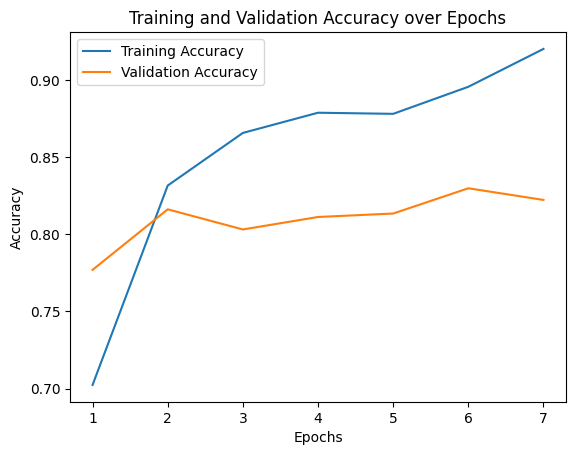

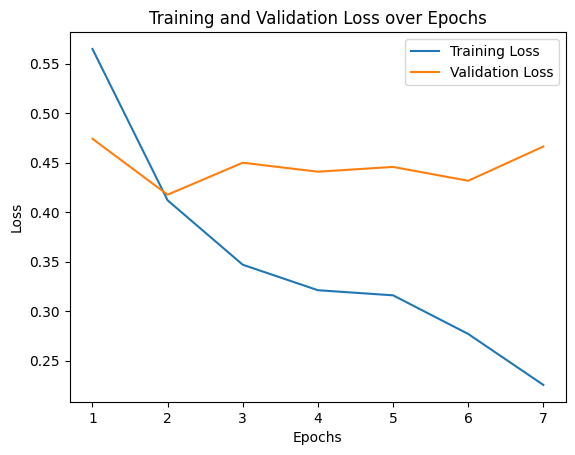

In [ ]:
# Số epoch thực tế đã chạy (do EarlyStopping có thể dừng sớm)
epochs_run3 = len(history3.history['loss'])
# Assuming `history` contains the training history of the model
accuracy3 = history3.history['accuracy']
val_accuracy3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Plotting
plt.plot(range(1, epochs_run3 + 1), accuracy3, label='Training Accuracy')
plt.plot(range(1, epochs_run3 + 1), val_accuracy3, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(range(1, epochs_run3 + 1), loss3, label='Training Loss')
plt.plot(range(1, epochs_run3 + 1), val_loss3, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
test_loss3, test_acc3 = model3.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc3:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.8211 - loss: 0.4125
Test Accuracy: 0.8162


In [ ]:
def predict_sentiment(review):
    review = tf.constant([review])  # Chuyển về dạng Tensor
    review = vectorize_layer(review)  # Mã hóa văn bản
    prediction = model3.predict(review)[0][0]  # Lấy xác suất dự đoán

    if prediction >= 0.5:
        print(f"Positive ({prediction:.4f})")
    else:
        print(f"Negative ({prediction:.4f})")

# Thử nghiệm với một câu mới
predict_sentiment("The movie was absolutely amazing! I loved it.")
predict_sentiment("This is the worst film I have ever watched.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Positive (0.9056)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Negative (0.0874)


GRU

In [ ]:
# Xây dựng mô hình GRU
model4 = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    GRU(32, dropout=0.3, recurrent_dropout=0.2),  # return_sequences=False vì chỉ cần lấy output cuối cùng
    Dense(16, activation='elu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Dự đoán nhị phân (0 hoặc 1)
])

# Biên dịch mô hình
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build mô hình với input shape cụ thể
model4.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
# Hiển thị mô hình
model4.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 256, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,953 (2.48 MB)

 Trainable params: 649,953 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop4 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history4 = model4.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    callbacks=[early_stop4]
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 169s 409ms/step - accuracy: 0.4981 - loss: 0.6937 - val_accuracy: 0.5088 - val_loss: 0.6927
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 181s 358ms/step - accuracy: 0.5314 - loss: 0.6886 - val_accuracy: 0.5255 - val_loss: 0.6868
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 354ms/step - accuracy: 0.5790 - loss: 0.6567 - val_accuracy: 0.5458 - val_loss: 0.6793
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 361ms/step - accuracy: 0.6115 - loss: 0.6083 - val_accuracy: 0.7992 - val_loss: 0.4591
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 389ms/step - accuracy: 0.8616 - loss: 0.3506 - val_accuracy: 0.8614 - val_loss: 0.3332
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 206s 399ms/step - accuracy: 0.9215 - loss: 0.2207 - val_accuracy: 0.8678 - val_loss: 0.3370
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 157s 396ms/step - accuracy: 0.9466 - loss: 0.1593 - val_accuracy: 0.8620 - val_loss: 0.3629
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 184s 350ms/step - accuracy: 0.9594 -

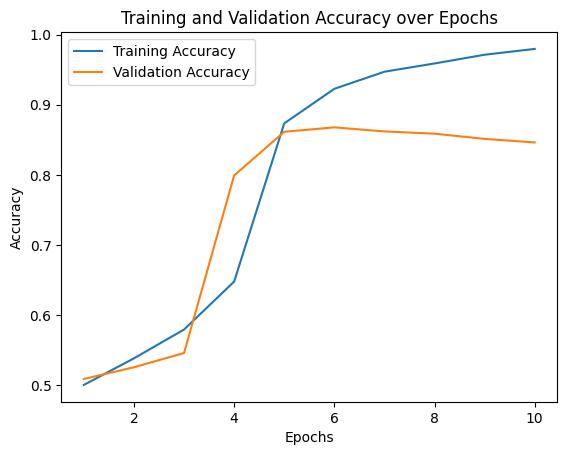

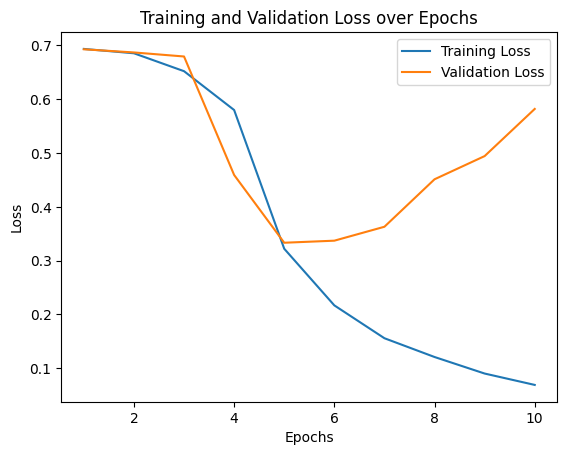

In [ ]:
# Số epoch thực tế đã chạy (do EarlyStopping có thể dừng sớm)
epochs_run4 = len(history4.history['loss'])
# Assuming `history` contains the training history of the model
accuracy4 = history4.history['accuracy']
val_accuracy4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

# Plotting
plt.plot(range(1, epochs_run4 + 1), accuracy4, label='Training Accuracy')
plt.plot(range(1, epochs_run4 + 1), val_accuracy4, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(range(1, epochs_run4 + 1), loss4, label='Training Loss')
plt.plot(range(1, epochs_run4 + 1), val_loss4, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
test_loss4, test_acc4 = model4.evaluate(test_dataset)
print(f'Độ chính xác trên tập kiểm tra: {test_acc4:.4f}')

391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.8620 - loss: 0.3328
Độ chính xác trên tập kiểm tra: 0.8614


In [ ]:
def predict_sentiment(review):
    review = tf.constant([review])  # Chuyển về dạng Tensor
    review = vectorize_layer(review)  # Mã hóa văn bản
    prediction = model4.predict(review)[0][0]  # Lấy xác suất dự đoán

    if prediction >= 0.5:
        print(f"Positive ({prediction:.4f})")
    else:
        print(f"Negative ({prediction:.4f})")

# Thử nghiệm với một câu mới
predict_sentiment("The movie was absolutely amazing! I loved it.")
predict_sentiment("This is the worst film I have ever watched.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Positive (0.9891)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Negative (0.0099)
